In [2]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm2

In [3]:
# Loading the Delhi air quality data set
df = pd.read_csv('delhi_aqi.csv')

# Checking dimensions of the data
print('The dimensions of the data set = (rows, columns) =', df.shape)

# Checking columns of the data
print(df.columns)

The dimensions of the data set = (rows, columns) = (18776, 9)
Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


In [4]:
# Checking for missing values in every column
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

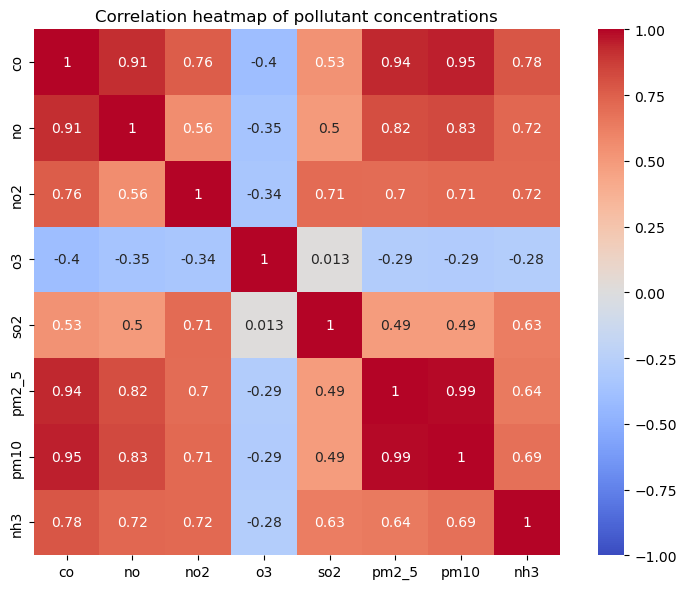

In [5]:
# To see the relationship between these pollutants, it is best to plot a correlation heat map. This will be useful later.

# Computing correlation matrix
corr = df.corr(numeric_only=True)

# Plotting heat map
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation heatmap of pollutant concentrations')
plt.tight_layout()
plt.show()

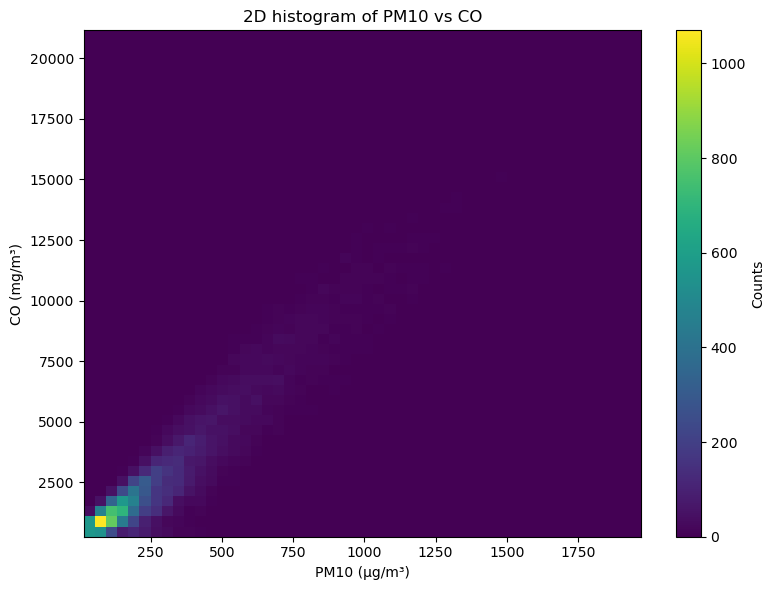

In [6]:
# It is interesting that pm10 and co have a high correlation, I will visualise this with a histogram

# Histogram of PM10 vs CO

plt.figure(figsize=(8, 6))
plt.hist2d(df['pm10'], df['co'], bins=50)
plt.colorbar(label='Counts')

plt.xlabel('PM10 (µg/m³)')
plt.ylabel('CO (mg/m³)')
plt.title('2D histogram of PM10 vs CO')
plt.tight_layout()
plt.show()

In [7]:
# Simple Linear Regression

# Define predictor and target
X = df.drop(columns=['co', 'date', 'pm2_5', 'no', 'no2', 'o3', 'so2', 'nh3'])  # keep only pm10
y = df['co']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict and compute metrics
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# printing metrics
print("Intercept:", model.intercept_)
print("Coefficient (pm10):", model.coef_[0])
print("r2:", r2)
print("Mean Squared Error:", mse)

Intercept: -117.48711812326974
Coefficient (pm10): 10.152573004389676
r2: 0.9029148752134494
Mean Squared Error: 791037.0213117921


In [8]:
# Define X and y for OLS (using only pm10 as predictor)
X_ols_simple = df[['pm10']]
y_ols_simple = df['co']

# Add intercept
X_ols_simple = sm2.add_constant(X_ols_simple)

# Fitting OLS model and making table of statistics
est_ols_simple = sm2.OLS(y_ols_simple, X_ols_simple).fit()
est_ols_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     co   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.746e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:48:58   Log-Likelihood:            -1.5414e+05
No. Observations:               18776   AIC:                         3.083e+05
Df Residuals:                   18774   BIC:                         3.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -117.4871      9.762    -12.035      0.000    -136.622     -98.353
pm10          10.1526      0.024    417.855      0.000      10.105      10.200
==============================================================================
Omnibus:                      897.896   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3053.532
Skew:                          -0.122   Prob(JB):                         0.00
Kurtosis:                       4.960   Cond. No.                         604.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I decided to choose co and pm10 because of the strong correlation they have on the heat map plotted earlier. I thought it was an interesting pair to explore.

The simple linear regression model using pm10 to predict co yields a strong result. The coefficient of 10.15 suggests that for every unit increase in pm10, co increases by approximately 10.15 units. The r2 value of 0.903 indicates that over 90% of the variance in CO levels is explained by pm10 alone, a very strong linear relationship. The mean squared error is 791,037, which should be evaluated in the context of the CO values range, but overall, the combination of high r2 and stable coefficient indicates a strong and reliable regression fit.

In [9]:
# Multiple linear regression

# Define predictors and target
X_full = df[['pm2_5', 'pm10', 'no', 'no2', 'so2', 'o3', 'nh3']]
y_full = df['co']

# Add intercept term
X_full = sm2.add_constant(X_full)

# Fit the model
est_full = sm2.OLS(y_full, X_full).fit()

# Show regression summary
est_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     co   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:48:58   Log-Likelihood:            -1.3833e+05
No. Observations:               18776   AIC:                         2.767e+05
Df Residuals:                   18768   BIC:                         2.767e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5806      6.279     39.750      0.000     237.274     261.888
pm2_5          1.6229      0.092     17.685      0.000       1.443       1.803
pm10           3.2663      0.082     40.051      0.000       3.106       3.426
no            18.3717      0.101    181.424      0.000      18.173      18.570
no2           13.1684      0.128    103.158      0.000      12.918      13.419
so2           -5.5642      0.098    -56.931      0.000      -5.756      -5.373
o3            -1.0327      0.044    -23.595      0.000      -1.118      -0.947
nh3           10.1942      0.202     50.351      0.000       9.797      10.591
==============================================================================
Omnibus:                     2347.249   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16951.890
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       7.593   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The variable pm2_5 had the lowest t-statistic (17.69) in the full regression model, indicating it contributed the least predictive power compared to the other variables. As seen below, the r2 and adj r2 values remained unchanged, the AIC increased only slightly, showing that removing pm2_5 did not have much of an effect. Its removal is therefore statistically justified as part of backward elimination.

In [10]:
# Refit model after dropping 'pm2_5'

X_drop_pm2_5 = df[['pm10', 'no', 'no2', 'so2', 'o3', 'nh3']]
y_drop_pm2_5 = df['co']

X_drop_pm2_5 = sm2.add_constant(X_drop_pm2_5)
est_drop_pm2_5 = sm2.OLS(y_drop_pm2_5, X_drop_pm2_5).fit()
est_drop_pm2_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     co   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.676e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:48:58   Log-Likelihood:            -1.3849e+05
No. Observations:               18776   AIC:                         2.770e+05
Df Residuals:                   18769   BIC:                         2.770e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.7244      6.183     36.508      0.000     213.605     237.843
pm10           4.6457      0.024    193.354      0.000       4.599       4.693
no            18.5458      0.102    182.504      0.000      18.347      18.745
no2           13.3534      0.128    104.098      0.000      13.102      13.605
so2           -5.3808      0.098    -54.913      0.000      -5.573      -5.189
o3            -1.0305      0.044    -23.353      0.000      -1.117      -0.944
nh3            8.8368      0.189     46.781      0.000       8.467       9.207
==============================================================================
Omnibus:                     1834.879   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13849.907
Skew:                           0.116   Prob(JB):                         0.00
Kurtosis:                       7.201   Cond. No.                         921.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# refit model after removing SO2

X_drop_so2 = df[['pm10', 'no', 'no2', 'o3', 'nh3']]
y_drop_so2 = df['co']

X_drop_so2 = sm2.add_constant(X_drop_so2)
est_drop_so2 = sm2.OLS(y_drop_so2, X_drop_so2).fit()
est_drop_so2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     co   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:48:59   Log-Likelihood:            -1.3989e+05
No. Observations:               18776   AIC:                         2.798e+05
Df Residuals:                   18770   BIC:                         2.798e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.6482      6.635     29.489      0.000     182.644     208.653
pm10           5.0656      0.025    206.434      0.000       5.017       5.114
no            16.6644      0.103    161.689      0.000      16.462      16.866
no2            8.9780      0.108     82.898      0.000       8.766       9.190
o3            -2.1982      0.042    -52.768      0.000      -2.280      -2.116
nh3            7.5915      0.202     37.576      0.000       7.196       7.988
==============================================================================
Omnibus:                     2248.549   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16769.358
Skew:                          -0.329   Prob(JB):                         0.00
Kurtosis:                       7.583   Cond. No.                         906.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Refit model after removing o3
X_drop_o3 = sm2.add_constant(df[['pm10', 'no', 'no2', 'nh3']])
y_drop_o3 = df['co']

est_drop_o3 = sm2.OLS(y_drop_o3, X_drop_o3).fit()
est_drop_o3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     co   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.874e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:48:59   Log-Likelihood:            -1.4119e+05
No. Observations:               18776   AIC:                         2.824e+05
Df Residuals:                   18771   BIC:                         2.824e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6449      5.958      0.780      0.436      -7.034      16.324
pm10           4.8944      0.026    187.784      0.000       4.843       4.946
no            18.0231      0.107    168.535      0.000      17.813      18.233
no2           10.3651      0.113     92.066      0.000      10.144      10.586
nh3            6.4810      0.215     30.100      0.000       6.059       6.903
==============================================================================
Omnibus:                     2487.450   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14997.173
Skew:                          -0.488   Prob(JB):                         0.00
Kurtosis:                       7.268   Cond. No.                         757.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variable o3 had the lowest t-statistic among the remaining predictors after the removal of pm2_5.

After removing o3 below, the models r2 and adjusted r2 both dropped slightly from 0.982 to 0.981, and the AIC increased slightly. Despite the change being minor, it does reflect a small reduction in explanatory power.

However, this drop is not substantial, and the remaining predictors remain highly significant. The removal of o3 is therefore still justified.

I believe dropping nh3 is justified as there has still not been much of an effect, the r2 and adj r2 values reduced from 0.981 to 0.979. The AIC and the F-statistic
increased moderately. Therefore I believe the rest of the predictors would have too much of an impact to drop, and are sufficient to be a set of predictors for predicting the co variable.

In [13]:
# Creating a summary table of the backward elimination

table = pd.DataFrame([
    {'Predictors Used': 'pm2_5, pm10, no, no2, so2, o3, nh3',
     'r2': 0.982,
     'Adj r2': 0.982,
     'AIC': est_full.aic,
     'Changes': 'All predictors included'},
    {'Predictors Used': 'pm10, no, no2, so2, o3, nh3',
     'r2': est_drop_pm2_5.rsquared,
     'Adj r2': est_drop_pm2_5.rsquared_adj,
     'AIC': est_drop_pm2_5.aic,
     'Changes': 'pm2_5 removed'},
    {'Predictors Used': 'pm10, no, no2, o3, nh3',
     'r2': est_drop_so2.rsquared,
     'Adj r2': est_drop_so2.rsquared_adj,
     'AIC': est_drop_so2.aic,
     'Changes': 'so2 removed'},
    {'Predictors Used': 'pm10, no, no2, nh3',
     'r2': est_drop_o3.rsquared,
     'Adj r2': est_drop_o3.rsquared_adj,
     'AIC': est_drop_o3.aic,
     'Changes': 'o3 removed'}])

table

,Predictors Used,r2,Adj r2,AIC,Changes
0,"pm2_5, pm10, no, no2, so2, o3, nh3",0.982000,0.982000,276683.307643,All predictors included
1,"pm10, no, no2, so2, o3, nh3",0.981674,0.981669,276991.622475,pm2_5 removed
2,"pm10, no, no2, o3, nh3",0.978730,0.978725,279787.050536,so2 removed
3,"pm10, no, no2, nh3",0.975575,0.975570,282382.174619,o3 removed


After removing pm2_5, so2 and o3, the final model, consisting of pm10, no, no2, and nh3, explained 97.6% of the variance in CO (r2 = 0.976). The removal of these predictors resulted in a model with minimal loss in performance, making it the optimal choice for predicting CO levels.